In [11]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore') 
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


![](https://cdn-images-1.medium.com/max/1000/1*gwmXliaxIBkY4NQBhoe9JQ.png)

**REFERENCES - Some of the graph ideas in this kernel are taken from https://avinashkz.com/data/visualization/2017/09/28/seaborn.html** 

# Dataset overview
The data set consists of 50 samples from each of three species Iris setosa, Iris virginica and Iris versicolor. 4 features were measured from each sample: the length and the width of the sepals and petals, in centimeters. 

In [12]:
df = pd.read_csv('/kaggle/input/iris/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [13]:
#make the Id column as index
df = pd.read_csv('/kaggle/input/iris/Iris.csv', index_col='Id')
df.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica
149,6.2,3.4,5.4,2.3,Iris-virginica
150,5.9,3.0,5.1,1.8,Iris-virginica


In [14]:
#Rename columns
df.rename({'SepalLengthCm': 'sepal_length',
           'SepalWidthCm': 'sepal_width',
           'PetalLengthCm': 'petal_length',
           'PetalWidthCm': 'petal_width',
           'Species': 'species'          
          }, inplace=True,axis=1)
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
Id,,,,,
91,5.5,2.6,4.4,1.2,Iris-versicolor
149,6.2,3.4,5.4,2.3,Iris-virginica
26,5.0,3.0,1.6,0.2,Iris-setosa
50,5.0,3.3,1.4,0.2,Iris-setosa
61,5.0,2.0,3.5,1.0,Iris-versicolor


In [15]:
#calculate median of each species
x = df.groupby('species').median()
x

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,5.0,3.4,1.50,0.2
Iris-versicolor,5.9,2.8,4.35,1.3
Iris-virginica,6.5,3.0,5.55,2.0


In [16]:
#Statistics of this dataset
stats = df.describe()
stats

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [17]:
#calculate range, and move columns 25%,50%,75%  and mean values into a dataframe
stats.loc['range'] = stats.loc['max'] - stats.loc['min']
new_df = stats.loc[['mean', 'range', '25%', '50%', '75%']]
new_df.rename({'50%': 'median'}, inplace=True)
new_df

,sepal_length,sepal_width,petal_length,petal_width
mean,5.843333,3.054,3.758667,1.198667
range,3.600000,2.400,5.900000,2.400000
25%,5.100000,2.800,1.600000,0.300000
median,5.800000,3.000,4.350000,1.300000
75%,6.400000,3.300,5.100000,1.800000


# Aggregation functions

In [18]:
#Calculate mean and median or others using multiple functions at once - 2 methods

df.groupby('species').agg(['mean', 'median'])  # passing a list of recognized strings
df.groupby('species').agg([np.mean, np.median]) 

sepal_length        sepal_width        petal_length         \
                        mean median        mean median         mean median   
species                                                                      
Iris-setosa            5.006    5.0       3.418    3.4        1.464   1.50   
Iris-versicolor        5.936    5.9       2.770    2.8        4.260   4.35   
Iris-virginica         6.588    6.5       2.974    3.0        5.552   5.55   

                petal_width         
                       mean median  
species                             
Iris-setosa           0.244    0.2  
Iris-versicolor       1.326    1.3  
Iris-virginica        2.026    2.0

In [19]:
#If we want an explicit aggr function like max for a column
agg_dict={field: ['mean', 'median'] for  field in df.columns.tolist() if field != 'species'}
agg_dict['petal_length'] = 'max'
df.groupby('species').agg(agg_dict)

sepal_length        sepal_width        petal_length  \
                        mean median        mean median          max   
species                                                               
Iris-setosa            5.006    5.0       3.418    3.4          1.9   
Iris-versicolor        5.936    5.9       2.770    2.8          5.1   
Iris-virginica         6.588    6.5       2.974    3.0          6.9   

                petal_width         
                       mean median  
species                             
Iris-setosa           0.244    0.2  
Iris-versicolor       1.326    1.3  
Iris-virginica        2.026    2.0

# Visualisations

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Distribution Plot

Text(0.5, 1.0, 'Distribution of petal-width')

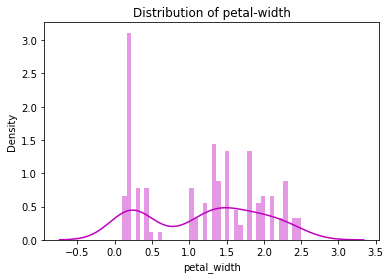

In [21]:
sns.distplot(a=df['petal_width'], bins=40, color='m')
plt.title('Distribution of petal-width')

# Count plot
**displays the number of observations for a categorical variable using bars.**

<AxesSubplot:xlabel='species', ylabel='count'>

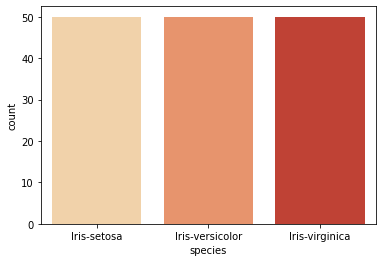

In [22]:
sns.countplot(x='species',data=df, palette="OrRd")

# Box Plot
**shows the distribution of quantitative data across a categorical variable.**

<AxesSubplot:xlabel='species', ylabel='sepal_width'>

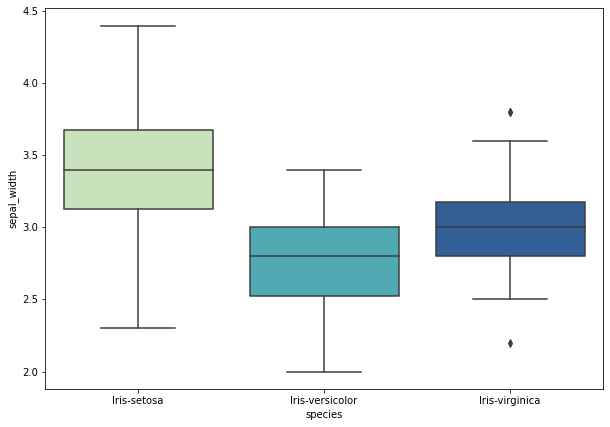

In [23]:
plt.figure(figsize=(10,7))
sns.boxplot(x='species',y='sepal_width',data=df ,palette='YlGnBu')

# violin plot
This is a variation of box plot. It shows the distribution of quantitative data across several levels of categorical variables. The violin plot also features a kde of the underlying distribution

<AxesSubplot:xlabel='species', ylabel='petal_length'>

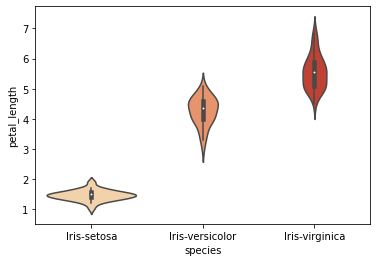

In [24]:
sns.violinplot(x='species', y='petal_length', data=df, palette='OrRd')

# Matrix plots
1. HeatMap -  It provides the graph of the correlation matrix.
2. Cluster Map - It is a plot of matrix dataset as a hierarchically clustered heatmap.

<AxesSubplot:>

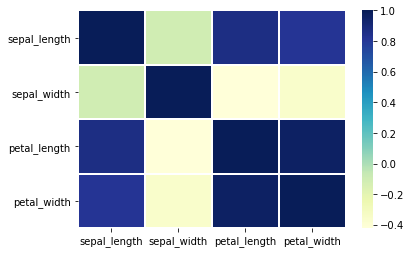

In [25]:
sns.heatmap(df.corr(),cmap="YlGnBu", linecolor='white', linewidths=1)

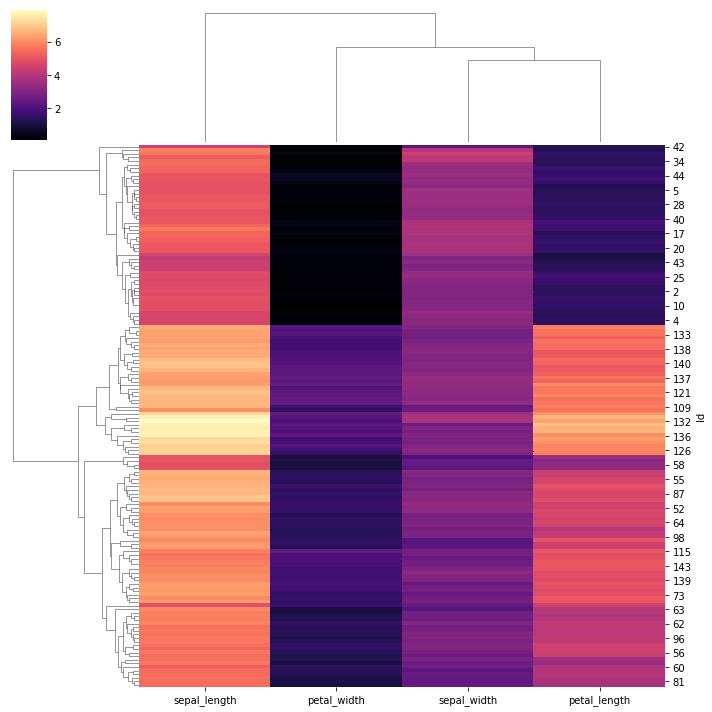

In [26]:
#Cluster map takes only quantitative variables, so we need to do some processing here.
x = df.drop('species',axis=1)
g = sns.clustermap(x, cmap="magma")

# Regression Plots

<AxesSubplot:xlabel='petal_width', ylabel='petal_length'>

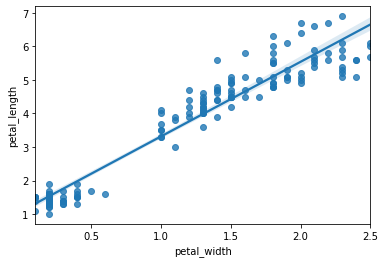

In [27]:
sns.regplot(x='petal_width', y='petal_length', data=df)

# Axis Grids - These are graphs that combine various plots using FacetGrid to realize complex visualizations.

# LM Plots

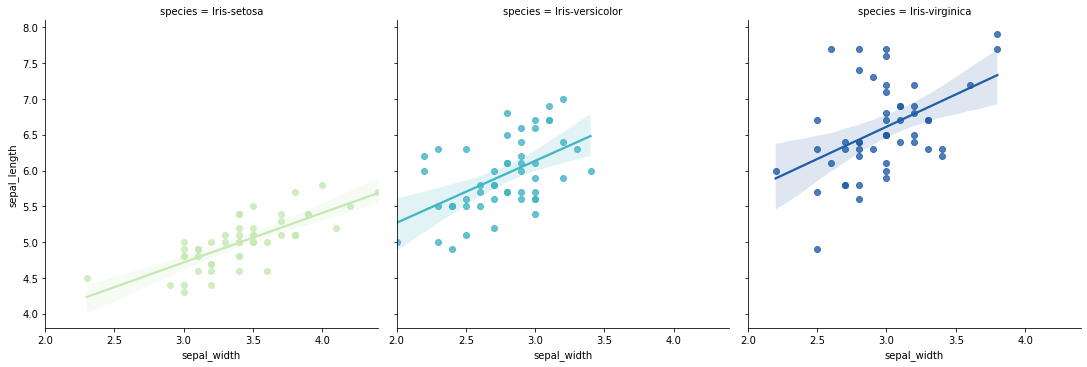

In [28]:
sns.lmplot(x = 'sepal_width', y = 'sepal_length', data = df, col = 'species', hue = 'species', palette = 'YlGnBu')

# Joint Plot
**Used to draw a plot of two variables with bivariate and univariate graphs.**

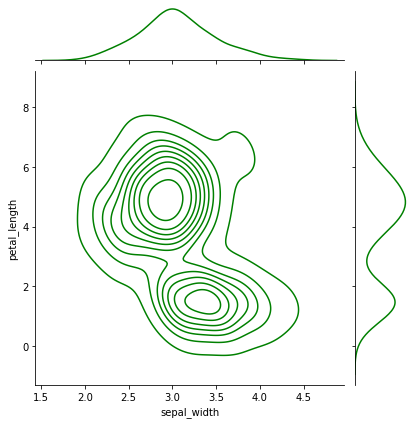

In [29]:
sns.jointplot(x="sepal_width", y="petal_length", data=df, kind="kde", color="g")

# Scatterplot

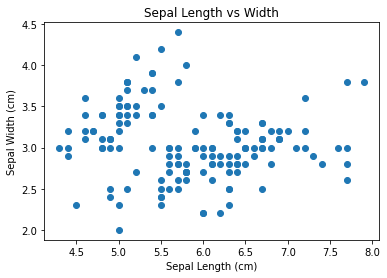

In [30]:
ax = plt.axes()

ax.scatter(df.sepal_length, df.sepal_width)

# Label the axes
ax.set(xlabel='Sepal Length (cm)',
       ylabel='Sepal Width (cm)',
       title='Sepal Length vs Width');

# Histograms

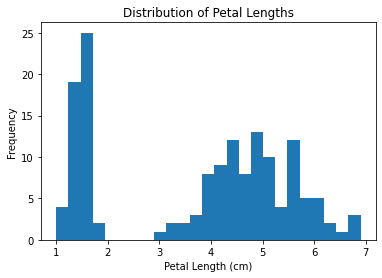

In [31]:
ax = plt.axes()
ax.hist(df.petal_length, bins=25);

ax.set(xlabel='Petal Length (cm)', 
       ylabel='Frequency',
       title='Distribution of Petal Lengths');

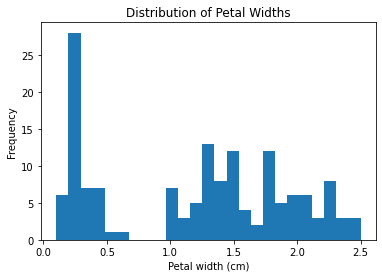

In [32]:
ax = plt.axes()
ax.hist(df.petal_width, bins=25);

ax.set(xlabel='Petal width (cm)', 
       ylabel='Frequency',
       title='Distribution of Petal Widths');

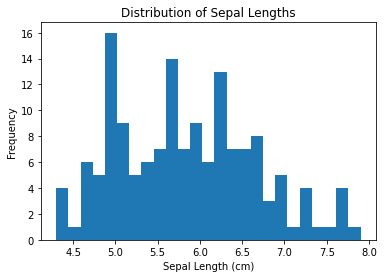

In [33]:
ax = plt.axes()
ax.hist(df.sepal_length, bins=25);

ax.set(xlabel='Sepal Length (cm)', 
       ylabel='Frequency',
       title='Distribution of Sepal Lengths');

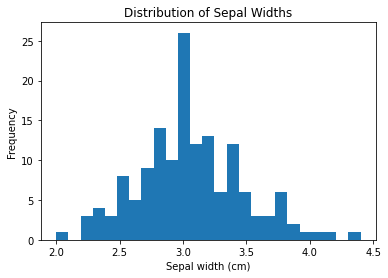

In [34]:
ax = plt.axes()
ax.hist(df.sepal_width, bins=25);

ax.set(xlabel='Sepal width (cm)', 
       ylabel='Frequency',
       title='Distribution of Sepal Widths');

# TAKE-AWAY From the histograms, we observe that Petal length and petal width are influencing variables for the different species

# plot histogram using pandas

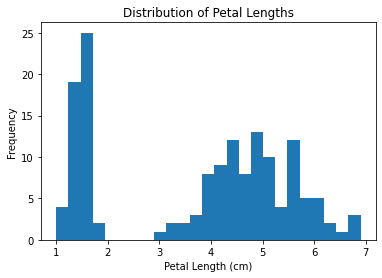

In [35]:
ax = df.petal_length.plot.hist(bins=25)

ax.set(xlabel='Petal Length (cm)', 
       ylabel='Frequency',
       title='Distribution of Petal Lengths');

# plotting all histograms

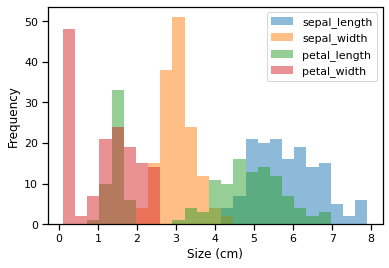

In [36]:
import seaborn as sns
sns.set_context('notebook')


ax = df.plot.hist(bins=25, alpha=0.5)
ax.set_xlabel('Size (cm)');

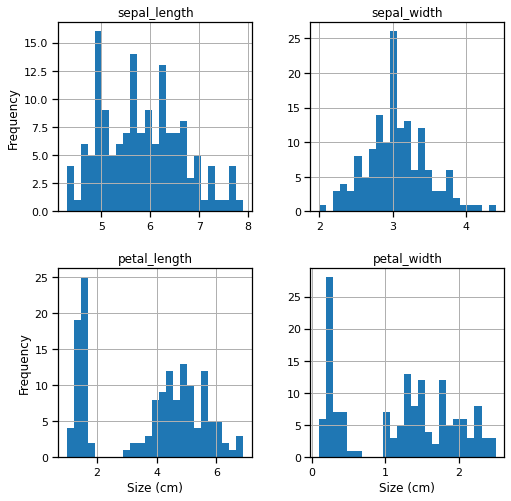

In [37]:
axList = df.hist(bins=25, figsize=(8,8))

# Add some x- and y- labels to first column and last row
for ax in axList.flatten():
    if ax.is_last_row():
        ax.set_xlabel('Size (cm)')
        
    if ax.is_first_col():
        ax.set_ylabel('Frequency')

# **all features in single boxplot**

In [38]:
# First we have to reshape the data so there is 
# only a single measurement in each column

plot_data = (df
             .set_index('species')
             .stack()
             .to_frame()
             .reset_index()
             .rename(columns={0:'size', 'level_1':'measurement'})
            )

plot_data.head()

,species,measurement,size
0,Iris-setosa,sepal_length,5.1
1,Iris-setosa,sepal_width,3.5
2,Iris-setosa,petal_length,1.4
3,Iris-setosa,petal_width,0.2
4,Iris-setosa,sepal_length,4.9


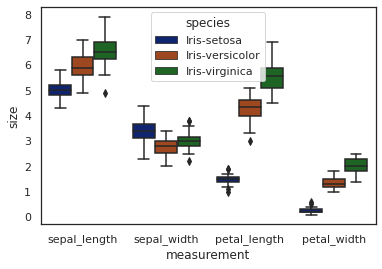

In [39]:
sns.set_style('white')
sns.set_context('notebook')
sns.set_palette('dark')

f = plt.figure(figsize=(6,4))
sns.boxplot(x='measurement', y='size', 
            hue='species', data=plot_data);

# **Pairplot to examine the correlations**

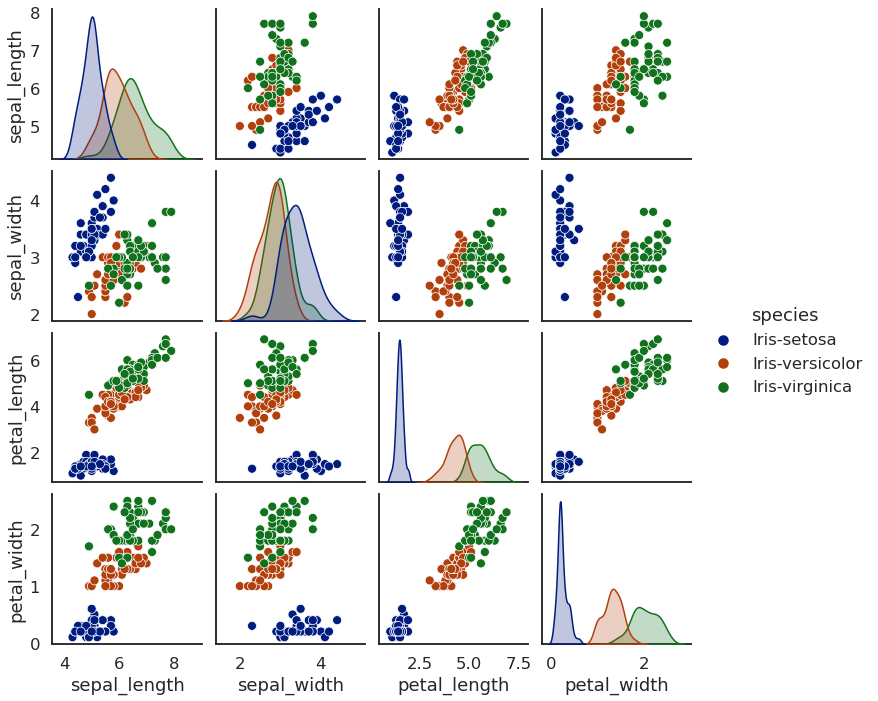

In [40]:
sns.set_context('talk')
sns.pairplot(df, hue='species');

In [41]:
from sklearn import datasets 
from sklearn.cluster import KMeans
#load the data
iris = datasets.load_iris()

print(iris.data)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [42]:
#Iris data Ground Truth result
print(iris.target)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [43]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

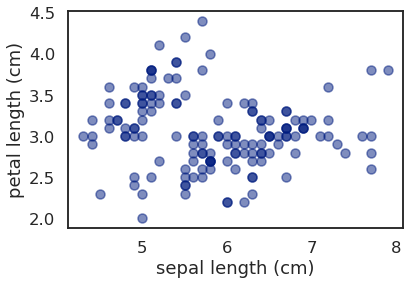

In [44]:
samples = iris.data
x = samples[:,0]
y = samples[:,1]

sepal_length_width = np.array(list(zip(x, y)))
plt.scatter(x, y, alpha=0.5)

plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')

plt.show()

# Clustering using k-means from scikit-learn library

In [45]:
k=3
model = KMeans(n_clusters = k)

In [46]:
#use .fit() method to fit the model to the samples
model.fit(samples)

KMeans(n_clusters=3)

In [47]:
# Use .predict() to determine the labels of samples 
labels = model.predict(samples)
# Print the labels
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


# Train-test splits

In [74]:
data = df.copy()
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [49]:
from sklearn.model_selection import train_test_split

target = 'species'
X = data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 11)
# it shows 80% of data is split for training and 20% of the data goes to testing.
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


In [80]:
from sklearn.preprocessing import LabelEncoder

def label_encode(df):
    # define ordinal encoding
    le = LabelEncoder()
    df['species'] = le.fit_transform(df['species'].iloc[:].values.ravel())
    df['species'] = pd.to_numeric(df['species'], downcast='integer')
    return df

In [81]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


In [82]:
data = label_encode(data)

In [83]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
Id,,,,,
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0
5,5.0,3.6,1.4,0.2,0


In [84]:
# Segregate features and labels into separate variables
X_train, X_test, y_train, y_test = train_test_split(data.loc[:, data.columns != 'species'], data['species'],
                                                    stratify=data['species'],
                                                    test_size=0.15)

X_train = pd.DataFrame(X_train, columns=data.columns.to_list()[:-1])
X_test = pd.DataFrame(X_test, columns=data.columns.to_list()[:-1])
y_train = pd.DataFrame(y_train, columns=['species'])
y_test = pd.DataFrame(y_test, columns=['species'])

print("Training dataset size:", X_train.shape)
print("Testing dataset size:", X_test.shape)
print("Training target size:", y_train.shape)
print("Testing target size:", y_test.shape)

Training dataset size: (127, 4)
Testing dataset size: (23, 4)
Training target size: (127, 1)
Testing target size: (23, 1)


# Logistic Regression

**Logistic Regression  is similar to Linear Regression but the target variable is categorical. It predicts the probability of an observation belonging to a category of the target variable. Sigmoid Function = ey / (1+ey) where ey = [co-efficients-matrix][feature-vector]**
![](https://lh3.googleusercontent.com/proxy/p9PrwtbztSEpP-KezpfM3HQBBOe0xqZAu_eAtlBgw-PnCzfgZhRoeysYkHyVjV8DppFcKT7ZaJTQ88SHXMfAU0PkdpXptmPuqWsjk0vSUKAclOYMBDMQVE9jm3U)

Source- https://www.google.com/url?sa=i&url=http%3A%2F%2Fjuangabrielgomila.com%2Fen%2Flogistic-regression-derivation%2F&psig=AOvVaw0NnEbsC6SfeEZ5QqseuWbG&ust=1617370255285000&source=images&cd=vfe&ved=0CAkQjhxqFwoTCMj2rO-T3e8CFQAAAAAdAAAAABAD

*Import the necessary libraries from sciki-learn package*

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print('Test Accuracy for Scikit-Learn model:', metrics.accuracy_score(y_test, y_pred)* 100,'%')

Test Accuracy for Scikit-Learn model: 93.33333333333333 %


In [85]:
from sklearn.decomposition import PCA
def get_pca_df(scaled_data, no_of_components):

  pca = PCA(n_components=no_of_components)
  Principal_components=pca.fit_transform(scaled_data)
  column_names = ["PC "+str(i) for i in range(1, no_of_components+1)]
  pca_df = pd.DataFrame(data = Principal_components, columns = column_names)
  return pca_df, pca

In [86]:
X_train = X_train.to_numpy() if isinstance(X_train, pd.DataFrame) else X_train
# PCA to reduce dimensionality from 20 to 15
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

In [87]:
X_train_pca

array([[-2.79565815, -0.28494791],
       [ 0.1775722 , -0.41125781],
       [ 3.45646691,  1.12836319],
       [-2.66537545,  0.62935761],
       [ 1.5339534 , -0.55938115],
       [ 1.47440502, -0.39850439],
       [ 0.59011147, -0.42892915],
       [ 1.052788  ,  0.26751323],
       [-0.12502492, -0.70820545],
       [-2.62677269,  0.54579674],
       [ 1.34146492, -0.30131409],
       [ 1.39519762, -0.16566923],
       [-2.86699754, -0.05388981],
       [ 2.8890074 ,  0.31232003],
       [ 1.92321178, -0.207379  ],
       [-2.34809198,  0.12627072],
       [ 3.45678904,  0.40922498],
       [ 2.23414593,  0.30430507],
       [ 0.93658657, -0.14058644],
       [ 0.76062525, -0.38869822],
       [-2.9101348 , -0.90836758],
       [ 0.88974323,  0.30343172],
       [-0.9634582 , -0.74693053],
       [-2.65829959,  0.04672474],
       [-2.24872568,  0.46446664],
       [ 1.04075906,  0.05605194],
       [ 1.32812978, -0.44139987],
       [-2.72139841, -0.08267444],
       [ 1.860628  ,

In [58]:
pip install annoy

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [59]:
from annoy import AnnoyIndex
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [88]:
n_trees = 10  # Number of trees in the index
index_dims = X_train_pca.shape[1]  # Number of dimensions in your data
n_neighbors = 5  # Number of nearest neighbors to consider

# Build the Annoy index
annoy_index = AnnoyIndex(index_dims, 'euclidean')
for i, x in enumerate(X_train_pca):
    annoy_index.add_item(i, x)
annoy_index.build(n_trees)

True

In [89]:
X_test = X_test.to_numpy() if isinstance(X_test, pd.DataFrame) else X_test

# Transform test data using PCA
X_test_pca = pca.transform(X_test)

In [90]:
# Query the index for nearest neighbors for all test data points
nearest_neighbors = []
for x in X_test_pca:
    nearest_neighbor_indices = annoy_index.get_nns_by_vector(x, n_neighbors)
    nearest_neighbors.append(nearest_neighbor_indices)

In [91]:
# Using KNN on the candidate neighbors
knn_classifier = KNeighborsClassifier(n_neighbors=n_neighbors)
knn_classifier.fit(X_train_pca, y_train)

KNeighborsClassifier()

In [92]:
import numpy as np  # Import NumPy library

#Convert nearest neighbor indices to actual data points from training set
nearest_neighbors_train = np.array([X_train_pca[indices] for indices in nearest_neighbors])


# # Stack the arrays along the last axis to ensure each row corresponds to a single data point
# nearest_neighbors_train = np.concatenate(nearest_neighbors_train)


In [93]:
# Ensure that nearest_neighbors_train has the same number of samples as X_test
nearest_neighbors_train.shape[0] == len(y_test)


True

In [94]:
# Predict labels using KNN
predicted_labels = []
for neighbors_indices in nearest_neighbors:
    # Retrieve the actual nearest neighbor data from X_train
    neighbors_data = X_train_pca[neighbors_indices]

    # Ensure proper reshaping of neighbors_data
    neighbors_data_reshaped = neighbors_data.reshape(-1, X_train_pca.shape[1])

    # Predict label for each test data point based on its neighbors
    predicted_label = knn_classifier.predict(neighbors_data_reshaped)
    predicted_labels.append(predicted_label)

In [95]:
predicted_labels

[array([0, 0, 0, 0, 0], dtype=int8),
 array([1, 1, 1, 1, 1], dtype=int8),
 array([1, 1, 1, 1, 1], dtype=int8),
 array([2, 2, 1, 2, 2], dtype=int8),
 array([1, 2, 1, 1, 2], dtype=int8),
 array([0, 0, 0, 0, 0], dtype=int8),
 array([1, 1, 1, 1, 1], dtype=int8),
 array([1, 1, 1, 1, 1], dtype=int8),
 array([0, 0, 0, 0, 0], dtype=int8),
 array([2, 2, 2, 2, 2], dtype=int8),
 array([0, 0, 0, 0, 0], dtype=int8),
 array([2, 2, 2, 2, 2], dtype=int8),
 array([2, 2, 2, 2, 2], dtype=int8),
 array([1, 1, 1, 1, 1], dtype=int8),
 array([1, 1, 1, 1, 1], dtype=int8),
 array([1, 1, 1, 1, 1], dtype=int8),
 array([0, 0, 0, 0, 0], dtype=int8),
 array([0, 0, 0, 0, 0], dtype=int8),
 array([2, 2, 2, 2, 2], dtype=int8),
 array([2, 2, 2, 2, 2], dtype=int8),
 array([2, 2, 2, 2, 2], dtype=int8),
 array([0, 0, 0, 0, 0], dtype=int8),
 array([0, 0, 0, 0, 0], dtype=int8)]

In [96]:
import numpy as np

# Convert list of arrays to a 2D numpy array
predicted_labels_array = np.array(predicted_labels)

# Ensure all elements are of type int
predicted_labels_array = predicted_labels_array.astype(int)

# Get the majority voted label
predicted_labels_majority = np.array([np.argmax(np.bincount(predictions)) for predictions in predicted_labels_array])


In [97]:
accuracy = accuracy_score(y_test, predicted_labels_majority)
print("Accuracy:", accuracy)

Accuracy: 0.9130434782608695


# Evaluation Metrics
1. 	Jaccard-index
2.	Confusion matrix
3.	Logloss
4.  F1-Score

In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.83      1.00      0.91        10
 Iris-virginica       1.00      0.82      0.90        11

       accuracy                           0.93        30
      macro avg       0.94      0.94      0.94        30
   weighted avg       0.94      0.93      0.93        30

